In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

# PCA for Error Data

In [2]:
# read data
PATH = "../../my_data/identification-dataset/my_custom_data/error-identification-dataset.csv"
df = pd.read_csv(PATH)

In [3]:
# drop uncomplete rows
df.dropna(inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59871 entries, 0 to 59870
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tdoa12            59871 non-null  float64
 1   tdoa21            59871 non-null  float64
 2   snr_an1           59871 non-null  float64
 3   power_dif_an1     59871 non-null  float64
 4   snr_an2           59871 non-null  float64
 5   power_dif_an2     59871 non-null  float64
 6   an1_rx_snr        59871 non-null  float64
 7   an1_rx_powerdif   59871 non-null  float64
 8   an1_tof           59871 non-null  float64
 9   an2_rx_snr        59871 non-null  float64
 10  an2_rx_powerdif   59871 non-null  float64
 11  an2_tof           59871 non-null  float64
 12  material          59871 non-null  object 
 13  encoded_material  59871 non-null  int64  
 14  error             59871 non-null  float64
dtypes: float64(13), int64(1), object(1)
memory usage: 6.9+ MB


In [5]:
# show different label types
# df.encoded_material.unique()

In [6]:
# show the respective materials
df.material.unique()

array(['cardboard', 'foam', 'metal', 'plastic', 'wooden-cabinet',
       'wooden-shelf'], dtype=object)

In [7]:
# drop the encoded material column
df.drop('encoded_material', axis=1, inplace=True)

In [8]:
# Extracted features 
X = df.drop('material', axis=1)
y = df['material'] # Labels

In [9]:
# Feature Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [10]:
# Dimensionality reduction to two dimensions
pca = PCA(n_components=3)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [11]:
finalDf = pd.concat([principalDf, y], axis = 1)

In [12]:
finalDf.head()

,principal component 1,principal component 2,principal component 3,material
0,-1.013874,0.883566,-0.791710,cardboard
1,-1.007268,0.338998,-0.327670,cardboard
2,-1.200273,-1.624438,1.744225,cardboard
3,-0.874141,-1.201382,1.993510,cardboard
4,-0.385813,-0.747275,-0.551475,cardboard


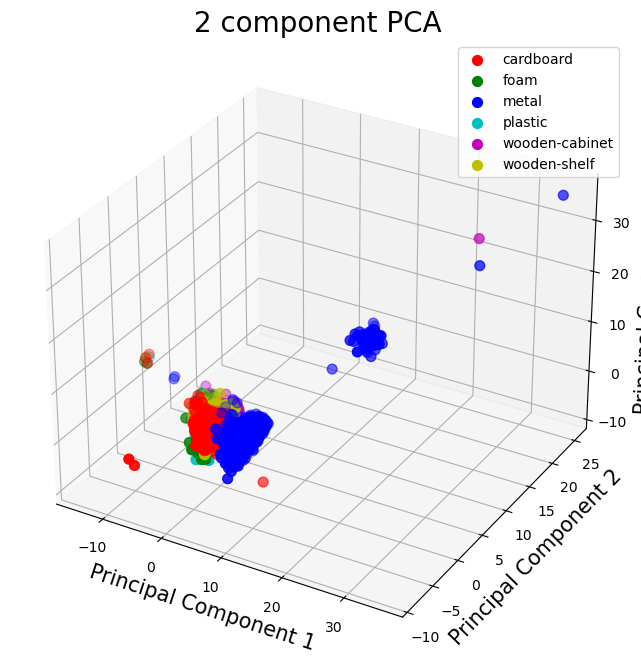

In [13]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['cardboard', 'foam', 'metal', 'plastic', 'wooden-cabinet', 'wooden-shelf']
colors = ['r', 'g', 'b', 'c', 'm', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['material'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'], 
               finalDf.loc[indicesToKeep, 'principal component 2'], 
               finalDf.loc[indicesToKeep, 'principal component 3'],
               c = color, s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
targets = ['cardboard', 'foam', 'metal', 'plastic', 'wooden-cabinet', 'wooden-shelf']
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow']

# Create traces
data = []
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['material'] == target
    trace = go.Scatter3d(
        x=finalDf.loc[indicesToKeep, 'principal component 1'],
        y=finalDf.loc[indicesToKeep, 'principal component 2'],
        z=finalDf.loc[indicesToKeep, 'principal component 3'],
        mode='markers',
        marker=dict(
            size=5,
            line=dict(
                color=color,
                width=0.5
            ),
            opacity=0.8
        ),
        name=target
    )
    data.append(trace)

# Layout
layout = go.Layout(
    title='t-SNE',
    scene=dict(
        xaxis_title='principal component 1',
        yaxis_title='principal component 2',
        zaxis_title='principal component 3'
    )
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Show the interactive plot
fig.show()

## Interpretation
**Inherent Complexity**: The original dataset may be inherently complex, and the variation in the data might not well-captured by just two or three principal components. In such cases, reducing the dimensionality to such a small number of dimensions can lead to significant information loss, making it difficult to distinguish between classes.

**Not Enough Components Retained**: Possible not enough principal components to explain a sufficient amount of variance in the data. If the top two or three principal components do not capture a substantial portion of the total variance, one may end up with a representation that does not adequately differentiate between classes.

**Non-Linearity**: PCA is a linear technique, meaning it's most effective when the underlying data relationships are linear. If the data contains complex, nonlinear relationships between features, PCA may not be able to capture them effectively in just two or three dimensions. Nonlinear dimensionality reduction techniques like t-SNE or UMAP might be more appropriate in such cases.

**Class Overlap**: It's also possible that the classes in the dataset have significant overlap in the reduced feature space. This can happen if the original features themselves do not separate the classes well, and PCA may not be able to improve this separation.

## Variation analysis

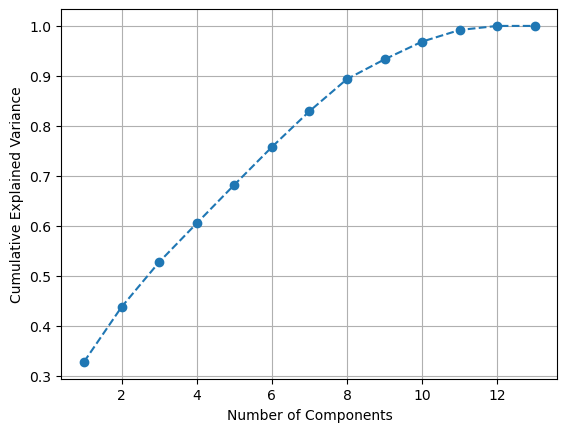

In [14]:
pca = PCA(n_components=13)
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.plot(range(1, 14), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()